# Introduction

In the previous two chapters, we learned that time series data is data that is measured at equally-spaced intervals, that time series data can be decomposed into trend, seasonality, and residuals, and that many time series models require the data to be stationary in order to make forecasts.  

Now we'll build upon that knowledge by exploring another important concept called **smoothing**.

## What Is Smoothing?
    Smoothing is a process that allows you to extract useful patterns from data.
### Types of Smoothing
- Simple average smoothing

- Equally weighted moving average

- Exponentially weighted moving average

## Why Is Smoothing Important?
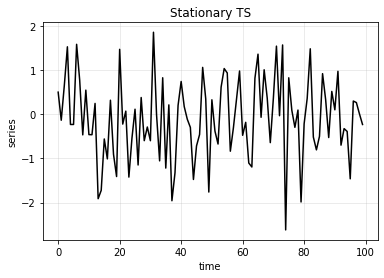
- Consider the stationary data above.
- How would you go about predicting
- what’s going to happen one, two, or more
    steps into the future?

## Imports

In [2]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [4]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

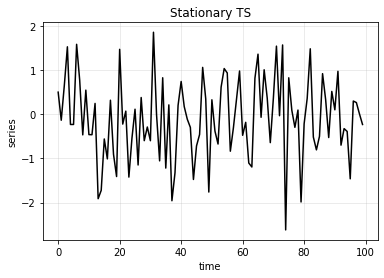

In [5]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

### 1. Simple Smoothing
Simple smoothing is the most obvious place to start. 

Consider the stationary data above. How would you go about extracting information from this series? 

Forecast future periods for stationary(constant mean) time series could be the mean :)!!

In [6]:
# find mean of series
stationary_time_series_avg = np.mean(stationary)

# create array composed of mean value and equal to length of time array
sts_avg = np.full(shape=len(time), fill_value=stationary_time_series_avg, dtype='float')

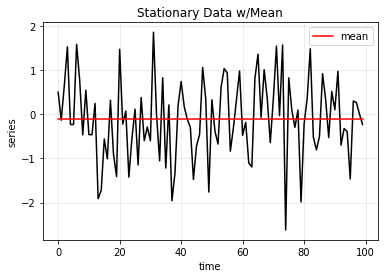

In [7]:
run_sequence_plot(time, stationary,
                  title="Stationary Data w/Mean")
plt.plot(time, sts_avg, 'r', label="mean")
plt.legend();

### Evaluating the model
- Mean Squared Error (MSE).
The formula for MSE is:
> $MSE = \frac{1}{n}\sum_{i=0}^{n} (observed_{i} - estimate_{i})^2$

Having MSE gives us a way to compare different estimates to see which is best. 

Now let's create a function to calculate MSE and discuss smoothing when a trend is present.

#### MSE Function
Let's create a Mean Squared Error function that we can use going forward.

In [8]:
def mse(observations, estimates): 
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    return mse

Let's test the **mse** function.

In [9]:
zeros = mse(np.array([0, 1, 2, 3]), np.array([0, 0, 0, 0]))
print(zeros)

14


In [10]:
ones = mse(np.array([0, 1, 2, 3]), np.array([1, 1, 1, 1]))
print(ones)

6


#### Trend

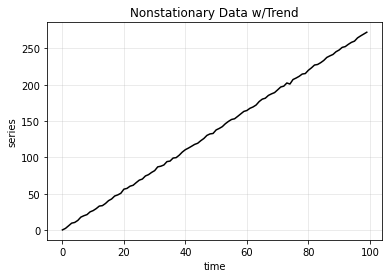

In [12]:
trend = (time * 2.75) + stationary
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

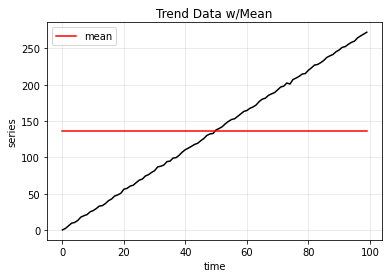

In [14]:
# find mean of series
trend_time_series_avg = np.mean(trend)

# create array of mean value equal to length of time array
trend_avg = np.full(shape=len(time), fill_value=trend_time_series_avg, dtype='float')

run_sequence_plot(time, trend,
                  title="Trend Data w/Mean")
plt.plot(time, trend_avg, 'r', label="mean")
plt.legend();

**Question:** Do you think this would be a good way to extract information if a trend is present?

**Answer:** No, the plot clearly shows this is problematic.

Therefore, we must find another way to approximate the underlying pattern inherent in the data. Let's start with something called a moving average.

### 2. Moving Average Smoothing

There are two types of MA Smoothing:
- Equally weighted
- Exponentially weighted

In [24]:
def moving_average(observations, window=3, forecast=False):
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

Great, now let's calculate the moving average of the trend data.

In [25]:
smoothed_trend = moving_average(trend, window=3, forecast=False)

In [26]:
smoothed_trend.size

98

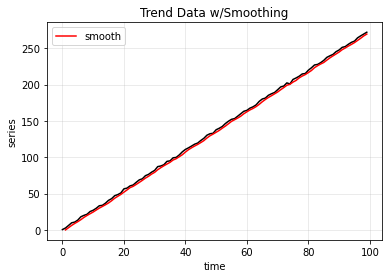

In [28]:
run_sequence_plot(time, trend,
                  title="Trend Data w/Smoothing")
plt.plot(time[1:], np.insert(smoothed_trend,0,0), 'r', label="smooth")
plt.legend();

In [31]:
seasonality = 10 + np.sin(time) * 10
smoothed_seasonality = moving_average(seasonality, window=3, forecast=False)

In [36]:
moving_average(seasonality, window=3, forecast=True)

array([ 0.        ,  0.        ,  0.        , 15.83589471, 16.30629473,
       10.97871647,  4.75131079,  3.34952577,  8.06215609, 14.55643116,
       16.86154444, 12.8581854 ,  6.22702389,  3.06471922,  6.27867971,
       12.91400492, 16.87020744, 14.50997293,  8.00329011,  3.33237315,
        4.79164157, 11.03945071, 16.33159366, 15.8024986 ,  9.93861308,
        4.13116642,  3.71949828,  9.08209446, 15.28860876, 16.63280056,
       11.87882611,  5.3974676 ,  3.14765615,  7.19785804, 13.82433632,
       16.93473742, 13.66937292,  7.03040388,  3.12166781,  5.53683864,
       12.05541944, 16.68425708, 15.16761959,  8.89989648,  3.64360347,
        4.23135212, 10.12276902, 15.90131266, 16.25421665, 10.8570227 ,
        4.67188603,  3.38539277,  8.1803389 , 14.64827305, 16.84260639,
       12.74587898,  6.12460309,  3.06634925,  6.38286193, 13.02495467,
       16.88591803, 14.41600011,  7.88603205,  3.29963637,  4.87352411,
       11.16067014, 16.38070139, 15.73434521,  9.81585849,  4.06

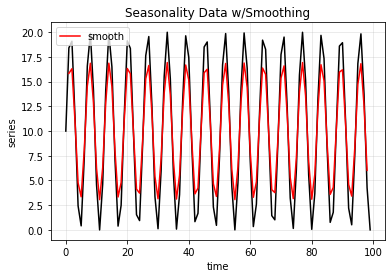

In [32]:
run_sequence_plot(time, seasonality,
                  title="Seasonality Data w/Smoothing")
plt.plot(time[1:-1], smoothed_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

In [33]:
trend_seasonality = trend + seasonality + stationary
smoothed_trend_seasonality = moving_average(trend_seasonality, window=3, forecast=False)

In [37]:
moving_average(trend_seasonality, window=3, forecast=True)

array([  0.        ,   0.        ,   0.        ,  19.25665363,
        23.16126413,  20.51975981,  16.45447048,  17.84014076,
        25.97049648,  35.05787993,  39.42189136,  37.34796405,
        33.46929896,  32.85659577,  37.85398122,  46.39984771,
        52.5698837 ,  53.55994861,  51.16270923,  49.01130124,
        52.95425461,  62.71966471,  71.21663951,  74.42409905,
        69.38328223,  66.11343128,  68.48069273,  76.77579199,
        86.34569345,  89.96551106,  88.53440316,  84.15144157,
        86.28690804,  93.27257427, 102.34504967, 107.51896193,
       106.19869981, 103.15411378, 100.14056769, 105.23417692,
       114.49475615, 123.6723516 , 125.90541699, 122.1793542 ,
       118.98001434, 121.21783614, 129.45645576, 137.87864268,
       142.67197615, 140.73375719, 136.43035294, 137.40516751,
       144.46431325, 154.40632617, 159.54238773, 159.13971485,
       156.34057371, 155.06505733, 160.23809541, 169.23017703,
       177.05098216, 177.21775633, 173.09317333, 169.86

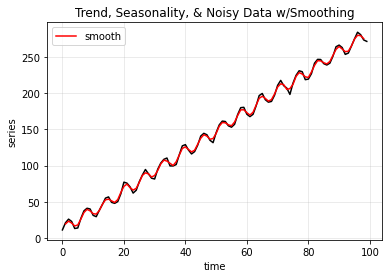

In [38]:
run_sequence_plot(time, trend_seasonality,
                  title="Trend, Seasonality, & Noisy Data w/Smoothing")
plt.plot(time[1:-1], smoothed_trend_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

A few questions should come to mind:
- How well does this method do from a forecasting perspective?
- Is equal weighting the best weighting scheme?
- This technique clearly lags the trend. That becomes a bigger problem as the
    trend becomes more aggressive.
This leads us to another averaging strategy: exponential smoothing.

### 3. Exponential Smoothing
different weights smoothing

In [39]:
values = np.array([1, 2, 4, 8, 16, 32, 64])
ma_smoothed_vals = moving_average(values, window=3, forecast=True)

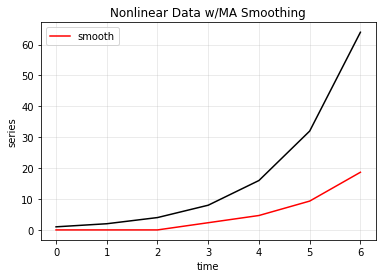

In [40]:
t = np.arange(len(values))
run_sequence_plot(t, values,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ma_smoothed_vals[:-1], 'r', label="smooth")
plt.legend(loc='upper left');

Now let's weight recent values more aggressively than older values. 

We'll use a simple exponential weighting whereby $w_{1} + w_{2}^2 + w_{3}^3 = 1$. 

This means $w_{1}$ is ~0.543, $w_{2}$ is ~0.294, and $w_{3}$ is ~0.160.

In [42]:
def ewma(observations, forecast=True):
    weights = np.array([0.16, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, 0)
    else:
        return output

In [43]:
ewma_smoothed_vals = ewma(values, forecast=True)

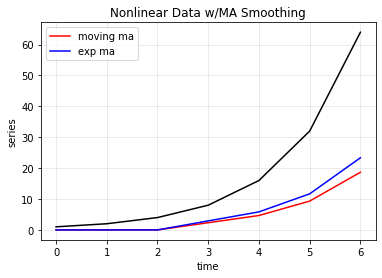

In [44]:
run_sequence_plot(t, values,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ma_smoothed_vals[:-1], 'r', label="moving ma")
plt.plot(t, ewma_smoothed_vals[:-1], 'b', label="exp ma")
plt.legend(loc='upper left');

> You can see both moving average techniques have trouble keeping pace with such an aggressive trend. There's significant lag.

#### Setting Weights
I chose the weights above for explanatory purposes but there are numerous methods to find the optimal weighting scheme. A full discussion is far beyond the scope of this tutorial. Nonetheless, it is helpful that you be acclimated to the formulation and possible initialization strategies.

The formulation is this: $S_{t} = \alpha*y_{t-1} + (1-\alpha)S_{t-1}$

$S_{t}$ is the smoothed value at time *t*  
$\alpha$ is a smoothing constant  
$y_{t-1}$ is the value of the series at time *t-1*

#### Initialization
There are many initialization strategies. A simple one is to set $S_2$ equal to $y_1$. Another strategy is to find the mean of the first couple of observations. Once you've initialized, you simply use the update rule above to calculate all values. 

Thankfully, you'll never have to actually go through this arduous process. There are great methods in **statsmodels** that will do all this heavy lifting for you. 

#### Setting Alpha
One last comment: choosing the optimal value for $\alpha$ is also taken care of for you by **statsmodels**. A solver uses a metric like MSE to find an $\alpha$ that minimizes that metric. Therefore, you rarely have to choose this value yourself, but at least you have a basic idea as to what's happening under the hood.

#### Three Types of Exponential Smoothing

There are three key exponential smoothing techniques you need to be aware of:
1. Single Exponential Smoothing - no trend or seasonality
2. Double Exponential Smoothing - captures trend
3. Triple Exponential Smoothing - captures trend & seasonality

#### Single Exponential
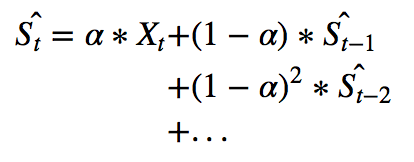
This method is useful if your data lacks trend and seasonality and you want to approximately track patterns in your data. Furthermore, this method removes the lag associated with the moving average techniques discussed above.

#### Double Exponential 
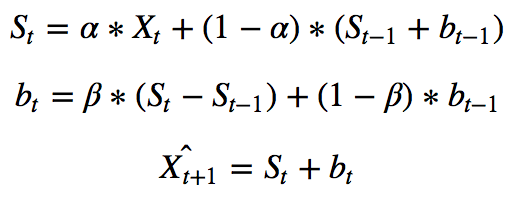
Should your data exhibit a trend, you'll want to use this smoothing method. It has all the benefits of Single Exponential with the ability to pickup on trend. 

#### Triple Exponential
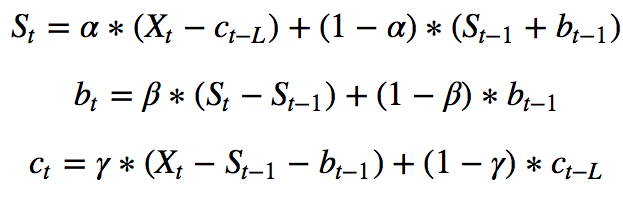
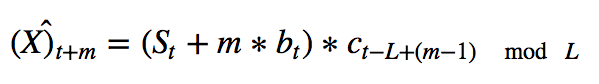
Should your data exhibit trend and seasonality, you'll want to use this smoothing method. It has all the benefits of Double Exponential with the ability to pickup on seasonality. 

# Smoothed Time Series in Python

#### Train/Test Split

In [60]:
train = trend_seasonality[:-5]
test = trend_seasonality[-5:]

#### Simple Average

In [61]:
# find mean of series
trend_seasonal_avg = np.mean(trend_seasonality)

# create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float')

# mse
simple_mse = mse(test, simple_avg_preds)

# results
print("Predictions: ", simple_avg_preds)
print("MSE: ", simple_mse)

Predictions:  [145.95522643 145.95522643 145.95522643 145.95522643 145.95522643]
MSE:  86295.31932923789


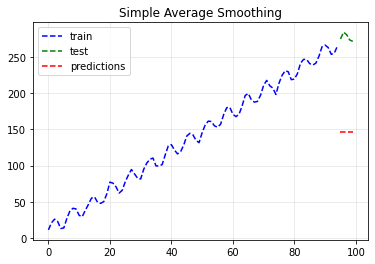

In [62]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, "g--", label="test")
plt.plot(time[-5:], simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3);

**Details:** This is a crude model to say the least, but it's a great model to use as a baseline. In other words, any model you produce moving forward should do much better than this one. 

#### Single Exponential

In [63]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [265.2632637 265.2632637 265.2632637 265.2632637 265.2632637]
MSE:  830.001033618639


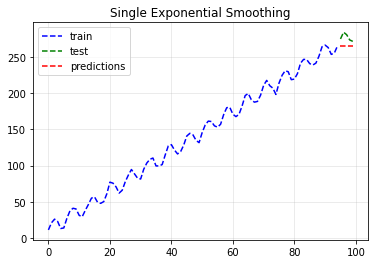

In [64]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, "g--", label="test")
plt.plot(time[-5:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** This is certainly better than the simple average method but it's still pretty crude. Notice how the forecast is a horizontal line. Single Exponential Smoothing cannot pickup on trend or seasonality, which harkens back to mean we calculated for the stationary data way back at the beginning.

#### Double Exponential

In [65]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [267.96833355 270.67340337 273.37847319 276.08354301 278.78861283]
MSE:  354.30135044228416


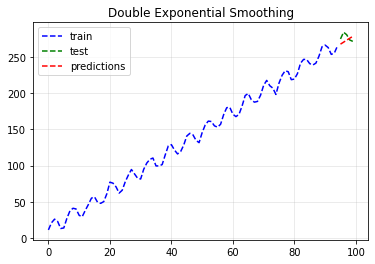

In [66]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test,"g--", label="test")
plt.plot(time[-5:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** Double Exponential Smoothing can pickup on trend, which is exactly what we see here. This is a significant leap but no quite where we need to be.

#### Triple Exponential

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [277.27548511 282.58451337 282.40232529 276.67313908 274.78362919]
MSE:  27.033074443644864


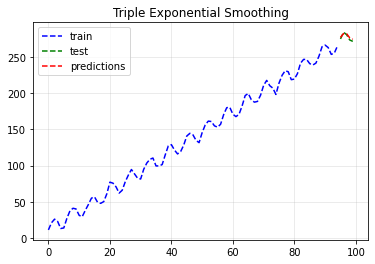

In [69]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, "g--", label="test")
plt.plot(time[-5:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** Triple Exponential Smoothing pickups trend and seasonality. This is clear in the plot above. This approach makes the most sense for this data.

#### Comparison

In [70]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
print(df)

                 MSE
simple  86295.319329
single    830.001034
double    354.301350
triple     27.033074


## Summary
- Does your data lack a trend?
    Use s ingle e xponential s moothing
- Does your data have trend but no seasonality?
    Use d ouble e xponential s moothing
- Does your data have trend and seasonality?
    Use t riple e xponential s moothing